# **Load libraries & data**

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("/Users/arpad/Downloads/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Exploratory data analysis**

In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [5]:
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

## Getting the categorical columns

In [6]:
string_col=df.select_dtypes("string").columns.to_list()
string_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [7]:
num_col=df.columns.to_list()
print(num_col)
for col in string_col:
    num_col.remove(col)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [8]:
df_numeric = df[num_col]

In [9]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Correlation Matrix

In [10]:
px.imshow(df_numeric.corr(),title="Correlation Plot of the Heart Failure Prediction")

## Visualization of heart disease distribution

In [11]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [12]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [13]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [14]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

In [15]:
fig = px.histogram(
    df,
    x="ST_Slope",
    color="HeartDisease",
    barmode="group",
    title="Distribution of ST_Slope",
    labels={"ST_Slope": "ST Slope", "HeartDisease": "Heart Disease"},
)
fig.show()


In [16]:
fig = px.histogram(
    df,
    x="ST_Slope",
    color="HeartDisease",
    facet_col="Sex",
    barmode="group",
    title="Distribution of ST_Slope by Sex and its Effect on Heart Disease",
    labels={
        "ST_Slope": "ST Slope",
        "HeartDisease": "Heart Disease",
        "Sex": "Sex"
    },
    hover_data=df.columns
)
fig.show()


# **Data Preprocessing**

## Checking for null val

In [17]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Data scaling

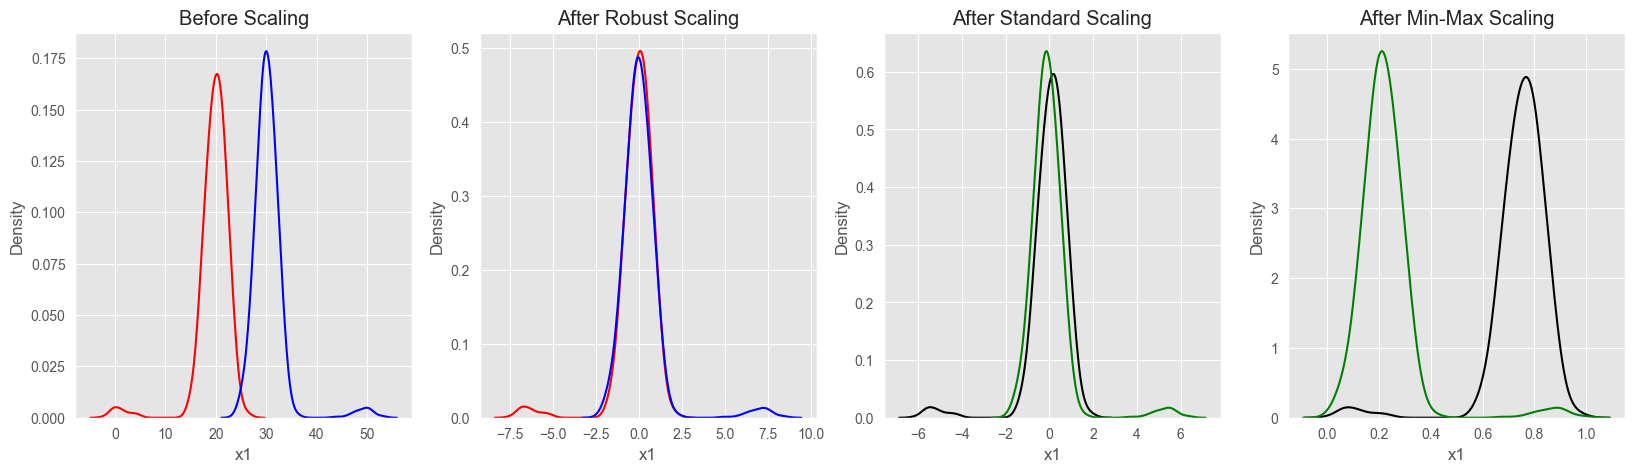

In [18]:
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [19]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


## Label Encoding

In [20]:
 # used for Tree Based Algorithms - Random forest
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


## One-Hot Encoding

In [21]:
#for working with non tree based algorithms - logistic regression
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [22]:
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


# **Model development**

## Logistic Regression

In [23]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [24]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)


    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

## Random Forest Classifier

In [25]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [26]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        82
           1       0.92      0.85      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 1 : 0.8776901004304162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        82
           1       0.92      0.75      0.82       102

    accuracy                           0.82       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.82      0.82       184

The accuracy for 2 : 0.8298660927785749
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83  

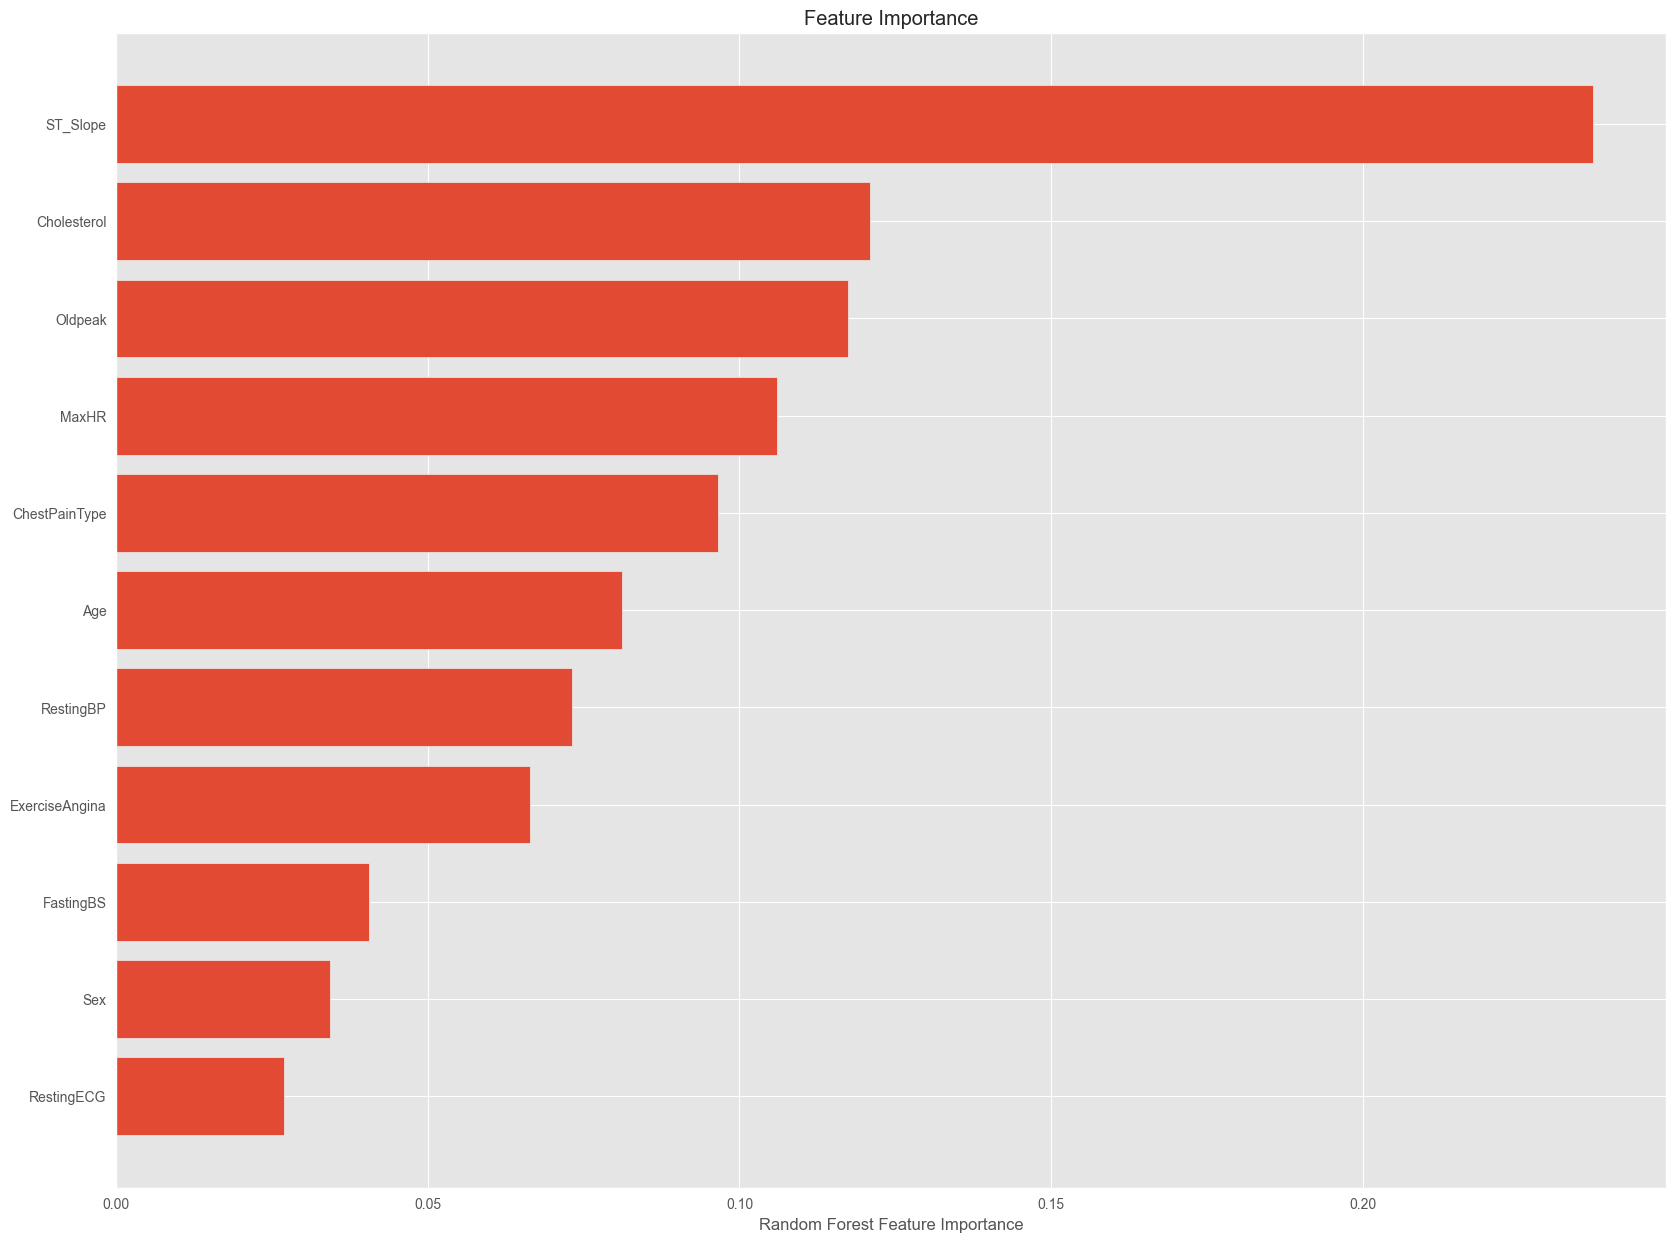

In [27]:
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib


ro_scaler = MinMaxScaler()
X_nontree_scaled = ro_scaler.fit_transform(df_nontree[feature_col_nontree])
clf_logistic = LogisticRegression()
clf_logistic.fit(X_nontree_scaled, y)

joblib.dump(clf_logistic, "logistic_regression_model.pkl")
joblib.dump(ro_scaler, "logistic_scaler.pkl")


['logistic_scaler.pkl']

In [29]:
clf_random_forest = RandomForestClassifier(n_estimators=200, criterion="entropy")
clf_random_forest.fit(df_tree[feature_col_tree], y)

joblib.dump(clf_random_forest, "random_forest_model.pkl")

['random_forest_model.pkl']

# **Prediction**

In [30]:
clf_logistic = joblib.load("logistic_regression_model.pkl")
clf_random_forest = joblib.load("random_forest_model.pkl")

ro_scaler = joblib.load("logistic_scaler.pkl")

In [43]:
example_input = {
    "Age": 75,
    "Sex": "F",
    "ChestPainType": "ASY",
    "RestingBP": 140,
    "Cholesterol": 350,
    "FastingBS": 0,
    "RestingECG": "Normal",
    "MaxHR": 150,
    "ExerciseAngina": "N",
    "Oldpeak": 1.5,
    "ST_Slope": "Down"

}

def prepare_logistic_input(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df, columns=string_col, drop_first=False)
    for col in feature_col_nontree:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df_scaled = ro_scaler.transform(input_df[feature_col_nontree])
    return input_df_scaled

def prepare_random_forest_input(input_data):
    input_df = pd.DataFrame([input_data])
    input_encoded = input_df.apply(LabelEncoder().fit_transform)  #
    for col in feature_col_tree:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    return input_encoded[feature_col_tree]


logistic_input = prepare_logistic_input(example_input)
logistic_prediction = clf_logistic.predict(logistic_input)
print(f"Logistic Regression Prediction: {'Heart Disease (1)' if logistic_prediction[0] else 'No Heart Disease (0)'}")

random_forest_input = prepare_random_forest_input(example_input)
random_forest_prediction = clf_random_forest.predict(random_forest_input)
print(f"Random Forest Prediction: {'Heart Disease (1)' if random_forest_prediction[0] else 'No Heart Disease (0)'}")

Logistic Regression Prediction: No Heart Disease (0)
Random Forest Prediction: Heart Disease (1)


In [44]:
logistic_prob = clf_logistic.predict_proba(logistic_input)[:, 1]
random_forest_prob = clf_random_forest.predict_proba(random_forest_input)[:, 1]

avg_prob = (logistic_prob + random_forest_prob) / 2
final_prediction = 1 if avg_prob >= 0.5 else 0

print(f"Final Averaged Prediction: {'Heart Disease (1)' if final_prediction else 'No Heart Disease (0)'}")

Final Averaged Prediction: Heart Disease (1)
